# Transaction & Traffic Analytics and Customer Clustering Project
### Data Analyst - Hoàng Tiến Đạt

In [1]:
import pandas as pd 
import os
import numpy as np 
import datetime as dt 
from datetime import timedelta
from datetime import date
from datetime import datetime
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
cus_info = pd.read_excel("E:\Documents\DA anh Long\Project Data Done\Clustering\customers (UK).xlsx",sheet_name='customer info')

In [3]:
cus_items = pd.read_excel("E:\Documents\DA anh Long\Project Data Done\Clustering\customers (UK).xlsx",sheet_name='Items')

In [4]:
cus_trans = pd.read_excel("E:\Documents\DA anh Long\Project Data Done\Clustering\customers (UK).xlsx",sheet_name='Customer transactions')

In [5]:
traffic_path = "E:\\Documents\\DA anh Long\\Project Data Done\\Clustering\\Traffic\\"
list_files = os.listdir(traffic_path)
list_files = list_files[1:]
traffic_01 = pd.read_excel(traffic_path+'2020_01.xlsx')
for i in list_files:
    file_path = os.path.join(traffic_path, i)
    traffic_02 = pd.read_excel(file_path)
    traffic_01 = pd.concat([traffic_01,traffic_02],ignore_index=True)
    print(f'processed{i}')



processed2020_02.xlsx
processed2020_03.xlsx
processed2020_04.xlsx
processed2020_05.xlsx
processed2020_06.xlsx
processed2020_07.xlsx
processed2020_08.xlsx
processed2020_09.xlsx
processed2020_10.xlsx
processed2020_11.xlsx
processed2020_12.xlsx


In [6]:
traffic_01

,Page URL,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY)
0,/2020/1/032irview0.686128260621012,5669.2,5777.8,6286.4,"Ki)D3jDmA,RIP68X",2020-01-10 16:56:13
1,/2020/1/070ttream0.518887735674677,359.8,370.4,403.4,GO4582ey<S!+k1VE,2020-01-10 05:04:35
2,/2020/1/070htream0.333307794468401,587.6,614.2,657.6,G.Kb^jz*soY!(-4Q,2020-01-16 23:27:08
3,/2020/1/100Grseys0.271522111052549,1284.0,1308.6,1385.4,Dr|vm[-5p~56Y\mk,2020-01-17 12:32:24
4,/2020/1/100[nside0.645837365801341,1846.0,1880.8,2025.0,Dr|vm[-5p~56Y\mk,2020-01-23 05:21:08
...,...,...,...,...,...,...
17884,/2020/12/yinfbowls0.6558670149224,130.0,133.2,142.2,HoXbja)_x007f_qT:ESE8#,2020-12-01 04:55:35
17885,/2020/12/yosolease0.0455049365834417,314.6,325.6,365.2,"YoRQW7@*&5W+~4Y""",2020-12-03 15:25:00
17886,/2020/12/you^-info0.127669879156147,1419.6,1448.4,1615.8,"MouDd/fn,XEARhBp",2020-12-06 23:57:54
17887,/2020/12/youe-info0.729842478879044,483.8,487.6,509.6,"yo4}AUKGso=,?!DX",2020-12-04 05:59:22


In [7]:
traffic_01['Page URL'] = traffic_01['Page URL'].apply(lambda x: x.split('/')[-1])
traffic_01.sort_values(by='Posted On (DD/MM/YYYY)', ascending= True,ignore_index= True,inplace=True)


**Nối các bảng lại với nhau tạo thành một bảng**

In [8]:
data = cus_trans.merge(cus_info,left_on='CustomerID',right_on='ID',how='left').merge(cus_items,left_on='ItemID',right_on='ItemID',how='left')
data.drop(columns={'ID'},inplace=True)
data.sort_values(by='TransactionDate',ascending= True,ignore_index=True,inplace=True)

In [9]:
data.dtypes

OrderID                     int64
CustomerID                  int64
ItemID                      int64
TransactionDate    datetime64[ns]
Channel                    object
FirstName                  object
LastName                   object
Country                    object
DateJoined         datetime64[ns]
Gender                     object
Birthday           datetime64[ns]
Newsletter                 object
Product                    object
Brand                      object
SellPrice                   int64
CostPrice                   int64
dtype: object

In [10]:
data.isnull().any()

OrderID            False
CustomerID         False
ItemID             False
TransactionDate    False
Channel            False
FirstName          False
LastName           False
Country            False
DateJoined         False
Gender              True
Birthday           False
Newsletter         False
Product            False
Brand              False
SellPrice          False
CostPrice          False
dtype: bool

# 1.	Overview of our website traffic and revenue both channels

In [11]:
sub_traffic_01= traffic_01
sub_traffic_01['Posted On (DD/MM/YYYY)']= sub_traffic_01['Posted On (DD/MM/YYYY)'].dt.date
sum_pageview = sub_traffic_01.groupby('Posted On (DD/MM/YYYY)').agg({'pageviews':'sum','users':'sum'}).reset_index(names='date')

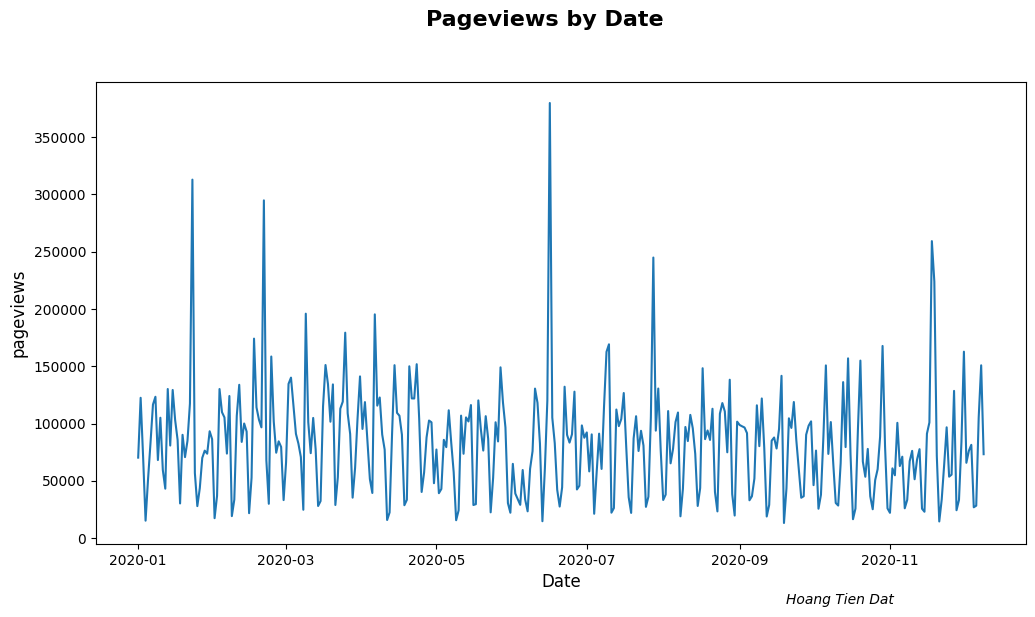

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(sum_pageview['date'],sum_pageview['pageviews'],)
plt.suptitle('Pageviews by Date', fontweight='bold', size=16, horizontalalignment='left', x=0.4, y = 1)
plt.xlabel('Date', size=12)
plt.ylabel('pageviews', size=12)
plt.text(0.7, 0.01, "Hoang Tien Dat", style='italic',transform=plt.gcf().transFigure)

plt.show()


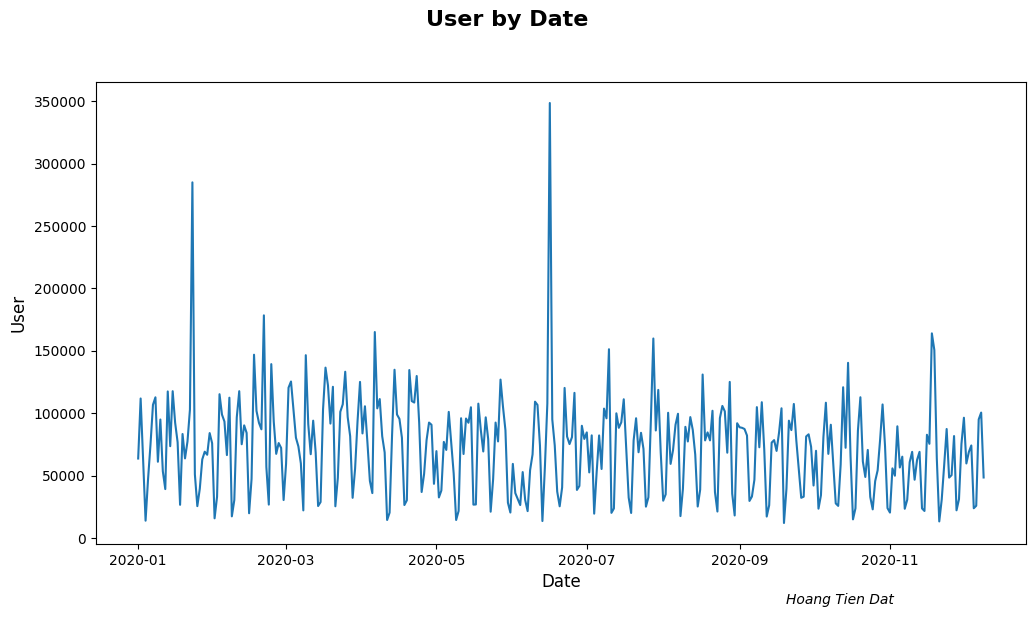

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(sum_pageview['date'],sum_pageview['users'])
plt.suptitle('User by Date', fontweight ='bold',size=16, horizontalalignment='left',x=0.4,y=1)
plt.xlabel('Date', size=12)
plt.ylabel('User', size=12)
plt.text(0.7, 0.01, "Hoang Tien Dat", style='italic',transform=plt.gcf().transFigure)
plt.show()

In [14]:
sum_pageview['date'] = pd.to_datetime(sum_pageview['date'])
sum_pageview['day_of_week'] =sum_pageview['date'].dt.day_name()
sum_day_of_week = sum_pageview.groupby('day_of_week').aggregate({'users':'mean'}).reset_index()
days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sum_day_of_week['day_of_week'] = pd.Categorical(sum_day_of_week['day_of_week'],categories=days_order,ordered=True)
sum_day_of_week.sort_values(by='day_of_week',inplace=True)

In [15]:
sum_day_of_week

,day_of_week,users
1,Monday,92073.632653
5,Tuesday,96304.036735
6,Wednesday,88239.787755
4,Thursday,89757.693878
0,Friday,81464.118367
2,Saturday,27008.142857
3,Sunday,34622.563265


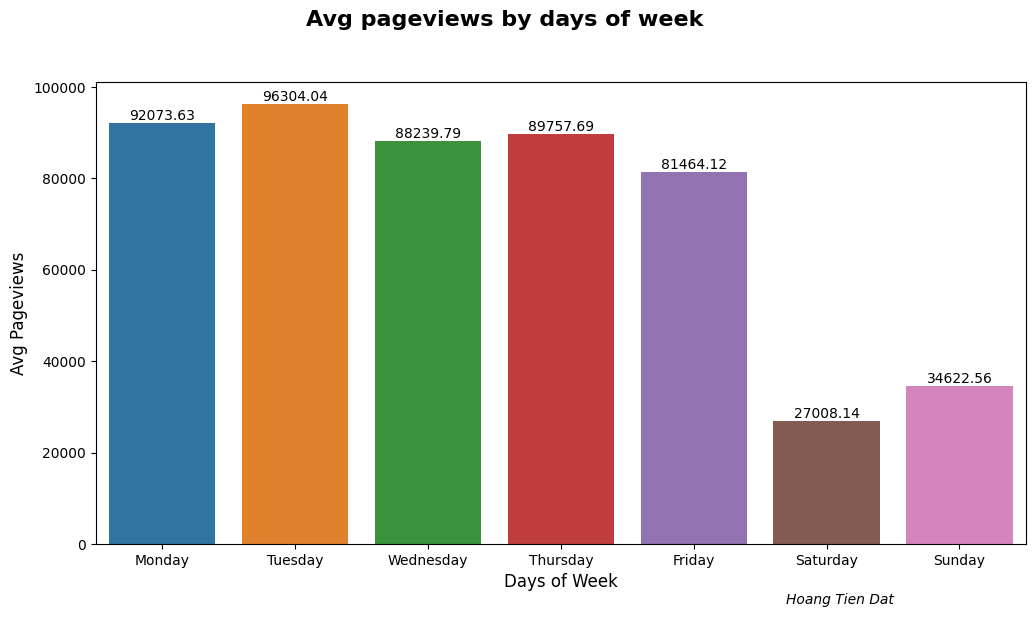

In [16]:
fig, ax= plt.subplots(figsize=(12,6))

ax = sns.barplot(data=sum_day_of_week,x='day_of_week',y='users')
plt.suptitle('Avg pageviews by days of week', fontweight ='bold',size=16, horizontalalignment='left',x=0.3,y=1)
plt.xlabel('Days of Week',size=12)
plt.ylabel('Avg Pageviews',size =12)
plt.text(0.7, 0.01, "Hoang Tien Dat", style='italic',transform=plt.gcf().transFigure)
for p in ax.patches:
    height_value = round(p.get_height(), 2)
    ax.annotate(f'{height_value}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


**kết Luận** Không có xu hướng rõ ràng cho pageviews và số lượng users nhưng có thể thấy rõ những khoảng thời gian nhu cầu sử dụng tăng cao đó là khoảng từ tháng 2 đến tháng 3 (đó là khoảng tế âm lịch), và khoảng từ tháng 6 đến giữa tháng 7 (đó là tầm hè). Trong tuần lượng truy cập luôn cao hơn gấp đôi , thậm chí là gấp 3 số lượng truy cập vào cuối tuần.

## Compare the number of orders, items and revenue between 2 channels: In Store and Online

In [17]:
data_2 = data[['TransactionDate','OrderID','ItemID','Channel','SellPrice','CostPrice']]
data_2['NetProfit'] = data['SellPrice']-data['CostPrice']
data_2.drop(columns={'CostPrice'},inplace=True)
data_2=data_2.groupby(['TransactionDate','Channel']).agg({'OrderID':'count','ItemID':'count','SellPrice':'sum','NetProfit':'sum',}).reset_index()
data_2.rename(columns={'OrderID':'Total_orders','ItemID':'Total_items','SellPrice':'Total_revenue'},inplace=True)
data_2

C:\Users\Admin\AppData\Local\Temp\ipykernel_15628\2822347166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['NetProfit'] = data['SellPrice']-data['CostPrice']
C:\Users\Admin\AppData\Local\Temp\ipykernel_15628\2822347166.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2.drop(columns={'CostPrice'},inplace=True)


,TransactionDate,Channel,Total_orders,Total_items,Total_revenue,NetProfit
0,2020-01-01,In Store,30,30,23820,16038
1,2020-01-01,Online,36,36,32044,23275
2,2020-01-02,In Store,33,33,24069,16644
3,2020-01-02,Online,40,40,31612,22223
4,2020-01-03,In Store,46,46,37118,24388
...,...,...,...,...,...,...
643,2020-12-25,Online,43,43,31365,20501
644,2020-12-26,In Store,28,28,23072,15248
645,2020-12-26,Online,41,41,33473,21642
646,2020-12-27,In Store,45,45,37629,25504


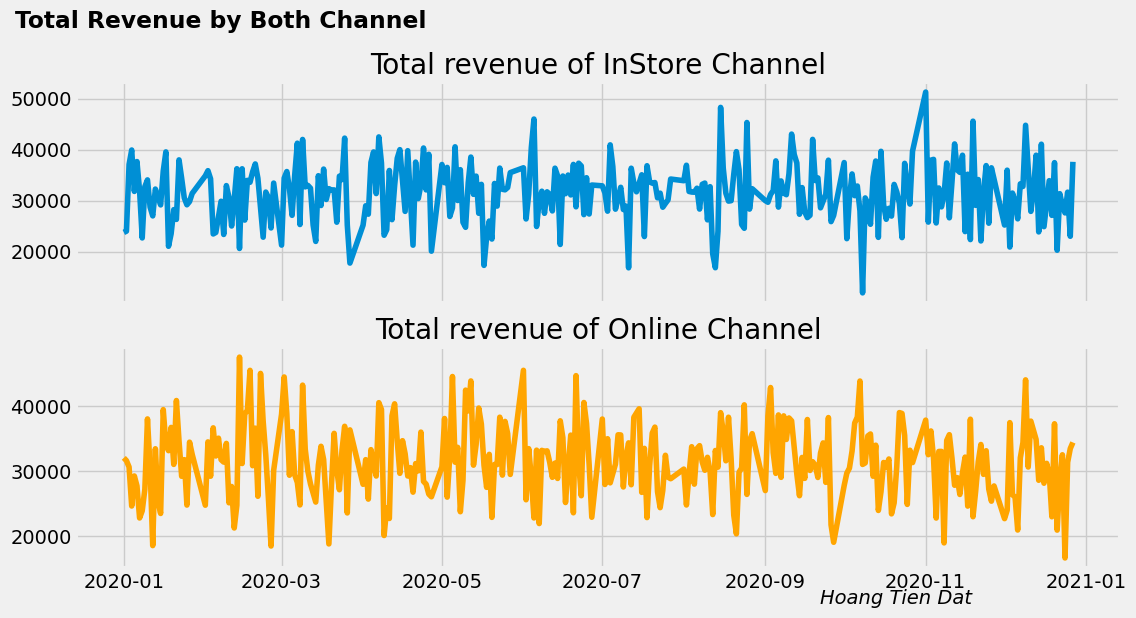

In [65]:
fig,ax = plt.subplots(2,1,figsize=(12,6),dpi=100, sharex=True)

ax[0].plot(data_2[data_2['Channel'] == 'In Store']['TransactionDate'],data_2[data_2['Channel'] == 'In Store']['Total_revenue'])
ax[0].set_title('Total revenue of InStore Channel')

ax[1].plot(data_2[data_2['Channel'] == 'Online']['TransactionDate'],data_2[data_2['Channel'] == 'Online']['Total_revenue'],color='orange')
ax[1].set_title('Total revenue of Online Channel')

plt.suptitle('Total Revenue by Both Channel',fontweight='bold',x=0.2,y=1)
plt.text(0.7, 0.01, "Hoang Tien Dat", style='italic',transform=plt.gcf().transFigure)
plt.show()

In [62]:
data[data['Channel'] == 'Online']['SellPrice'].mean()

811.1190229930783

In [63]:
data[data['Channel'] == 'In Store']['SellPrice'].mean()

808.4674944637773

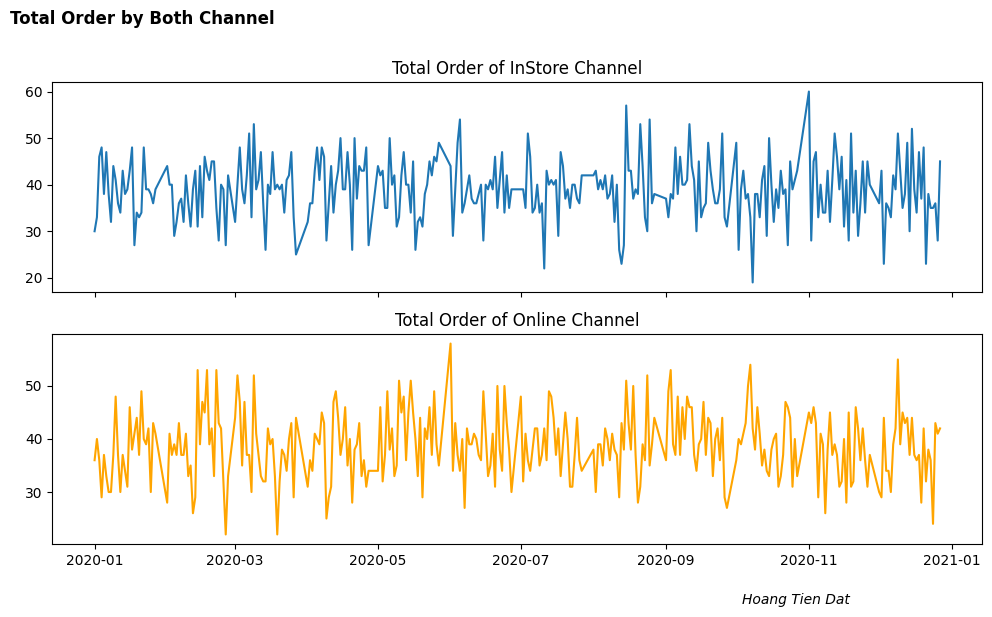

In [19]:
fig,ax = plt.subplots(2,1,figsize=(12,6),dpi=100, sharex=True)

ax[0].plot(data_2[data_2['Channel'] == 'In Store']['TransactionDate'],data_2[data_2['Channel'] == 'In Store']['Total_orders'])
ax[0].set_title('Total Order of InStore Channel')

ax[1].plot(data_2[data_2['Channel'] == 'Online']['TransactionDate'],data_2[data_2['Channel'] == 'Online']['Total_orders'],color='orange')
ax[1].set_title('Total Order of Online Channel')

plt.suptitle('Total Order by Both Channel',fontweight='bold',x=0.2,y=1)
plt.text(0.7, 0.01, "Hoang Tien Dat", style='italic',transform=plt.gcf().transFigure)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15628\1629310187.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summary_trans = data_2.groupby(['days_of_week','Channel']).sum().reset_index()


Text(0.7, 0.01, 'Hoang Tien Dat')

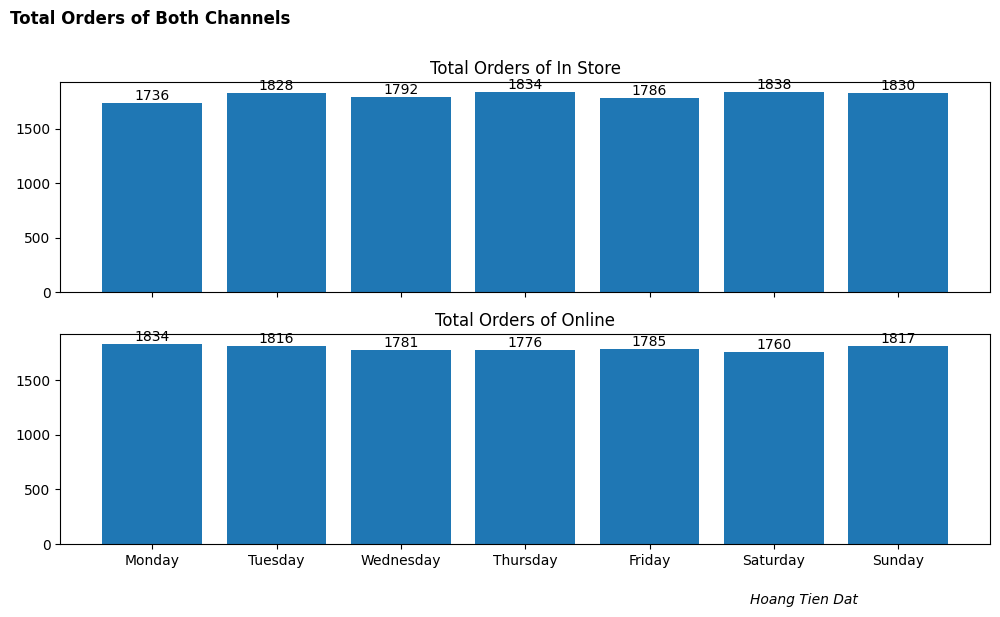

In [20]:
data_2['days_of_week'] = data_2['TransactionDate'].dt.day_name()
days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
data_2['days_of_week'] = pd.Categorical(data_2['days_of_week'],categories=days_order,ordered=True)
data_2.sort_values(by='days_of_week')
summary_trans = data_2.groupby(['days_of_week','Channel']).sum().reset_index()

fig,ax = plt.subplots(2,1,figsize=(12,6),sharex=True)
bars = ax[0].bar(summary_trans[summary_trans['Channel']=='In Store']['days_of_week'],summary_trans[summary_trans['Channel']=='In Store']['Total_orders'])
for p in bars:
    height_value = round(p.get_height(), 2)
    ax[0].annotate(f'{height_value}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
ax[0].set_title('Total Orders of In Store')

bars = ax[1].bar(summary_trans[summary_trans['Channel']=='Online']['days_of_week'],summary_trans[summary_trans['Channel']=='Online']['Total_orders'])
for p in bars:
    height_value = round(p.get_height(), 2)
    ax[1].annotate(f'{height_value}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
ax[1].set_title('Total Orders of Online')
plt.suptitle('Total Orders of Both Channels',fontweight= 'bold',x=0.2,y=1)
plt.text(0.7, 0.01, "Hoang Tien Dat", style='italic',transform=plt.gcf().transFigure)


In [21]:
summary_trans


,days_of_week,Channel,Total_orders,Total_items,Total_revenue,NetProfit
0,Monday,In Store,1736,1736,1407496,937199
1,Monday,Online,1834,1834,1492275,987402
2,Tuesday,In Store,1828,1828,1480061,993724
3,Tuesday,Online,1816,1816,1492530,1009128
4,Wednesday,In Store,1792,1792,1446409,962933
5,Wednesday,Online,1781,1781,1463568,984869
6,Thursday,In Store,1834,1834,1486697,992556
7,Thursday,Online,1776,1776,1429224,953869
8,Friday,In Store,1786,1786,1422159,945303
9,Friday,Online,1785,1785,1439336,957021


In [66]:
data

,OrderID,CustomerID,ItemID,TransactionDate,Channel,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter,Product,Brand,SellPrice,CostPrice
0,1639,144,2736,2020-01-01,Online,Ric0.12434077974775,Tamo0.747855032136146,IT - Italy,2015-03-09,M,1993-02-26,N,plaU-info0.921152245977159,So)zm5Pl^_G5_x007f_t?q,747,363
1,6695,612,14942,2020-01-01,In Store,Ridh0.6269774796358,Zuk0.439693338061207,FR - France,2016-09-13,NaN,2007-12-02,N,appu-news0.135855850839363,Ap!FulqmT[82a2/E,929,348
2,1170,108,12987,2020-01-01,In Store,Ch0.237920427031177,Loh0.791222685855633,FR - France,2016-03-22,M,1967-07-25,N,tesac-car0.479461576739068,Te0.)edhJTDlX%vE,1394,472
3,1830,166,3252,2020-01-01,In Store,Fern0.180060029060372,Medin0.634042769916507,IT - Italy,2016-05-03,F,1976-12-11,Y,app`event0.449118870823293,Ap!FulqmT[82a2/E,561,280
4,5800,533,12603,2020-01-01,Online,Se0.730563054519865,Girsa0.795430113156434,UK - United Kingdom,2015-05-25,M,2004-08-27,N,nikJ-info0.174981244982583,NiPea$n|Eu@<@>'L,932,176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25208,4920,451,14977,2020-12-27,Online,To0.0670184936739923,Cho0.859489764477528,FR - France,2016-07-20,F,2002-11-07,N,asivlease0.83525923161775,AS&imO_x007f_s*;/:L*GK,1377,79
25209,2216,198,8737,2020-12-27,Online,Jeane0.0616080877516783,Wonok0.173576938485585,UK - United Kingdom,2016-05-25,M,1999-07-16,N,giv`kbook0.0367002783519702,BaM;gk|):j72N5{Y,500,350
25210,4788,439,17516,2020-12-27,In Store,Ste0.496218782584871,K0.249247385498351,FR - France,2016-07-01,F,1969-05-01,N,sahctream0.946607506588615,Sark_{}T:X<l>+G-,1190,258
25211,5436,502,10914,2020-12-27,In Store,Zul F0.707621809802674,Z0.145577438271525,UK - United Kingdom,2016-09-05,F,1977-04-16,Y,nikJ-info0.185347185685338,NiPea$n|Eu@<@>'L,1283,203


**Kết Luận** Không có sự khác biệt quá lớn giữa doanh thu và số lượng orders giữa cả hai kênh trong các tháng và các ngày trong tuần

In [22]:
traffic_01

,Page URL,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY)
0,vanBip-on0.100834672919284,1034.8,1048.4,1134.4,"Vag9""-Z=gN30ND@[",2020-01-01
1,fujBdence0.385183712192661,4097.8,4142.6,4457.2,ToOYo&o|?(;MH>V:,2020-01-01
2,baiXpsule0.236876019278184,642.6,653.8,726.8,PaasB'\_LlDEk`=W,2020-01-01
3,artjriner0.183950395687591,3413.0,3469.6,3795.6,Ro7|R40![FY$PS`<,2020-01-01
4,appMn-usd0.284138838758011,1447.0,1465.6,1562.6,MiUNo1$pZkrlcw>M,2020-01-01
...,...,...,...,...,...,...
17884,nicKailer0.757067004243723,369.4,375.8,398.6,NiBtFC>$5gmngibT,2020-12-09
17885,j-crvideo0.411325399883596,408.6,419.0,445.0,"J.>4'""@8pZooN<m.",2020-12-09
17886,asak-info0.272774402976534,286.8,291.8,307.6,AsX8Ks>t}q)0=|~C,2020-12-09
17887,andx-info0.805313550947187,1430.4,1457.8,1580.0,MaYv(\vK4F{`#->J,2020-12-09


In [23]:
corr_data= data[['TransactionDate','OrderID','SellPrice']]
corr_data= corr_data.groupby('TransactionDate').sum().reset_index(names='date')
corr_traffic = traffic_01.groupby('Posted On (DD/MM/YYYY)').sum().reset_index(names='date')
corr_traffic['date'] = pd.to_datetime(corr_traffic['date'])
correlation = corr_data.merge(corr_traffic,on='date',how='inner')
correlation.rename(columns={'OrderID':'Total_orders','SellPrice':'Total_revenue','users':'Total_users','uniquePageviews':'Total_uniquePageviews','pageviews':'Total_pageviews'},inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_15628\2973925287.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  corr_traffic = traffic_01.groupby('Posted On (DD/MM/YYYY)').sum().reset_index(names='date')


In [24]:
correlation

,date,Total_orders,Total_revenue,Total_users,Total_uniquePageviews,Total_pageviews
0,2020-01-01,275423,55864,63755.4,64814.8,70353.6
1,2020-01-02,294104,55681,111861.4,113640.0,122557.8
2,2020-01-03,299292,67753,63749.8,65175.4,71058.0
3,2020-01-04,335345,64573,13946.0,14274.6,15349.6
4,2020-01-05,345106,61098,47065.0,47856.6,51438.2
...,...,...,...,...,...,...
300,2020-12-05,252274,55953,23906.0,24678.8,27024.6
301,2020-12-06,267974,47406,25892.8,26517.0,28433.4
302,2020-12-07,339813,65365,95081.8,97565.0,105456.0
303,2020-12-08,323201,67222,100577.0,105419.6,150902.2


In [25]:
correlation.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15628\2548375467.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation.corr()


,Total_orders,Total_revenue,Total_users,Total_uniquePageviews,Total_pageviews
Total_orders,1.000000,0.823223,0.102764,0.104633,0.106626
Total_revenue,0.823223,1.000000,0.076276,0.075581,0.075464
Total_users,0.102764,0.076276,1.000000,0.999364,0.978222
Total_uniquePageviews,0.104633,0.075581,0.999364,1.000000,0.981307
Total_pageviews,0.106626,0.075464,0.978222,0.981307,1.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_15628\742590566.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(correlation.corr(), square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})


Text(0.7, 0.01, 'Hoang Tien Dat')

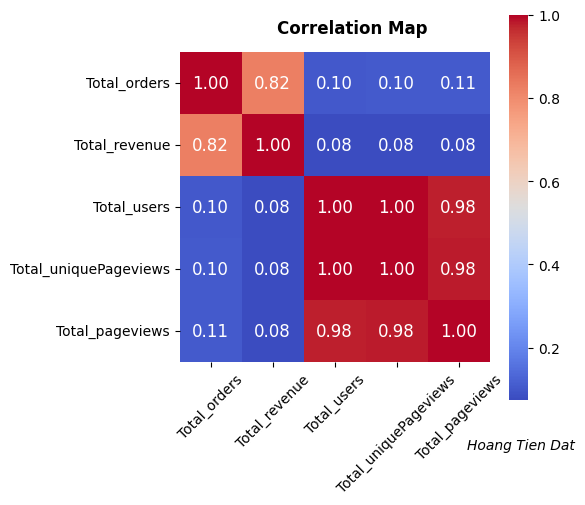

In [26]:
fig,ax = plt.subplots(figsize=(5,5))
sns.heatmap(correlation.corr(), square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
plt.xticks(rotation=45)
plt.suptitle('Correlation Map',fontweight='bold',horizontalalignment= 'left',x=0.32,y=0.87,size=12)
plt.text(0.7, 0.01, "Hoang Tien Dat", style='italic',transform=plt.gcf().transFigure)

# 2.	Top 10 Products and Brands


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, "NiPea$n|Eu@<@>'L"),
  Text(1, 0, 'Ac8IJsKH,4xtY.Tk'),
  Text(2, 0, "ad(;%f6iD'}9EHD["),
  Text(3, 0, 'muy(D#"d02`vwt_^'),
  Text(4, 0, 'Jo?$J}r__x007f_"0#/!m:'),
  Text(5, 0, 'Nes[8ukT8KBR8yVs'),
  Text(6, 0, 'Ap!FulqmT[82a2/E'),
  Text(7, 0, 'Al_w1b7Rgo1[d5(t'),
  Text(8, 0, 'Exa~e4sZi*|fpD<^'),
  Text(9, 0, 'MouDd/fn,XEARhBp')])

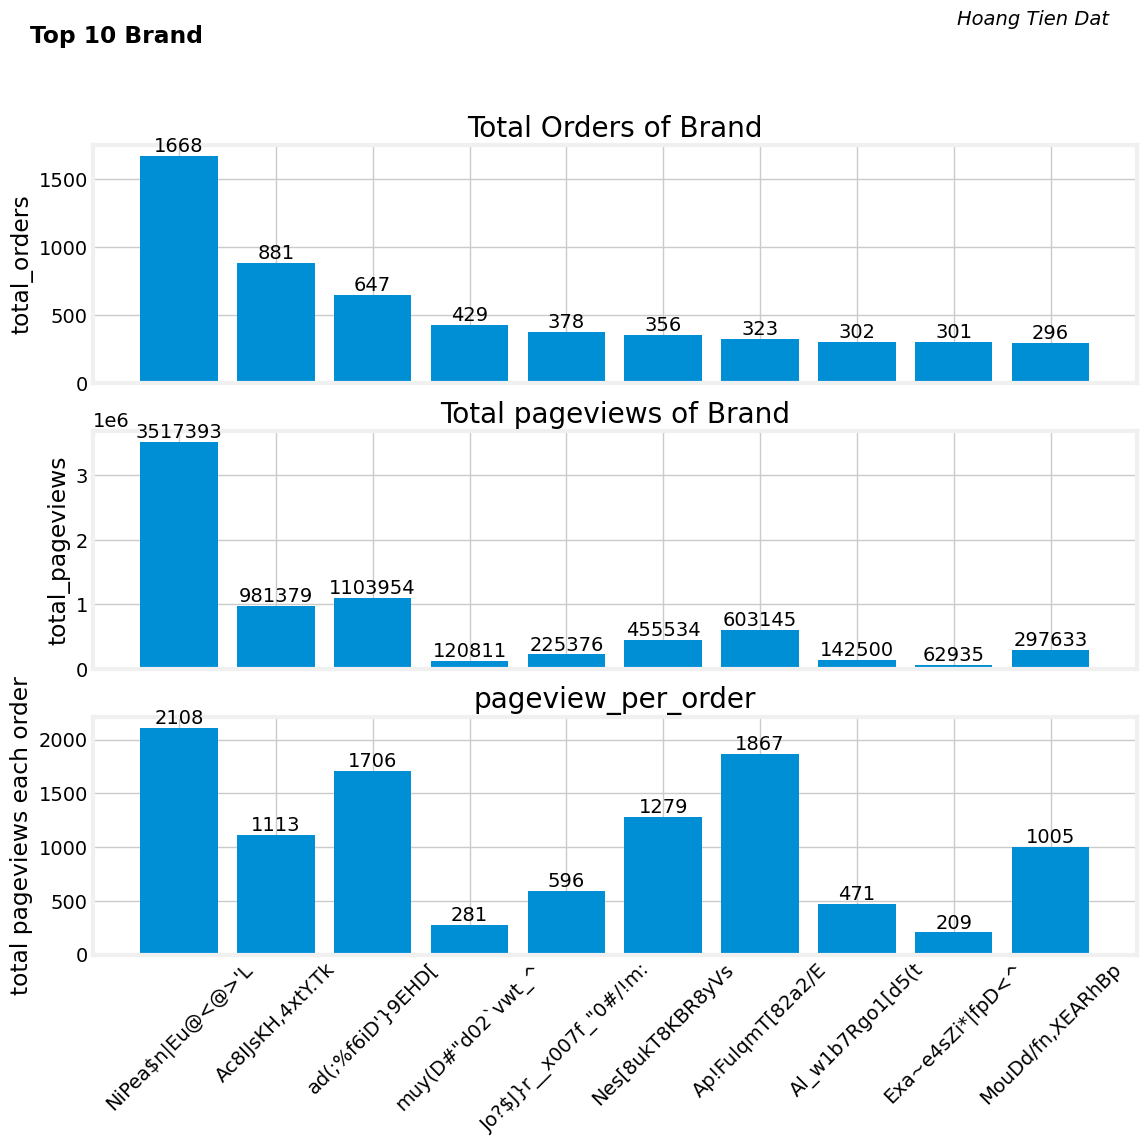

In [136]:
data_brand = data.groupby('Brand').aggregate({'SellPrice':'sum','OrderID':'count'}).reset_index()
traffic_brand = traffic_01.groupby('Brand').aggregate({'pageviews':'sum','users':'sum'})
brand = data_brand.join(traffic_brand,on='Brand',how='inner')
brand['rank_orders'] = brand['OrderID'].rank(ascending=False)
brand['rank_pageviews'] = brand['pageviews'].rank(ascending=False)
top10_brand = brand.sort_values(by='OrderID',ascending=False)
top10_brand = top10_brand.head(10)
top10_brand['pageview_per_order'] = top10_brand['pageviews']/top10_brand['OrderID']
top10_brand['pageview_per_order'] = top10_brand['pageview_per_order'].astype(int)

fig, ax = plt.subplots(3,1,figsize=(12,10), sharex= True)
bars1 = ax[0].bar(top10_brand['Brand'],top10_brand['OrderID'])
bars2 = ax[1].bar(top10_brand['Brand'],top10_brand['pageviews'])
bars3 = ax[2].bar(top10_brand['Brand'],top10_brand['pageview_per_order'])

ax[0].bar_label(bars1,fmt='%d',label_type = 'edge')
ax[1].bar_label(bars2,fmt='%d',label_type = 'edge')
ax[2].bar_label(bars3,fmt='%d',label_type = 'edge')

ax[0].set_title('Total Orders of Brand')
ax[1].set_title('Total pageviews of Brand')
ax[2].set_title('pageview_per_order')
ax[0].set_ylabel('total_orders')
ax[1].set_ylabel('total_pageviews')
ax[2].set_ylabel('total pageviews each order')
fig.set_facecolor('white')
for axes in ax:
    axes.set_facecolor('white')
plt.suptitle('Top 10 Brand',fontweight= 'bold',x=0.1,y=1)
plt.text(0.8, 1, "Hoang Tien Dat", style='italic',transform=plt.gcf().transFigure)
plt.xticks(rotation = 45)

In [116]:
top10_brand

,Brand,SellPrice,OrderID,pageviews,users,rank_orders,rank_pageviews,pageview_per_order
1732,NiPea$n|Eu@<@>'L,1317712,1668,3517393.2,3114392.8,1.0,1.0,2108
72,"Ac8IJsKH,4xtY.Tk",718302,881,981379.0,878548.4,2.0,3.0,1113
2689,ad(;%f6iD'}9EHD[,519038,647,1103954.0,991574.8,3.0,2.0,1706
2738,"muy(D#""d02`vwt_^",353514,429,120811.0,108461.4,4.0,30.0,281
1218,"Jo?$J}r__x007f_""0#/!m:",290526,378,225376.8,202394.0,5.0,14.0,596
1716,Nes[8ukT8KBR8yVs,302239,356,455534.8,402540.8,6.0,6.0,1279
178,Ap!FulqmT[82a2/E,258897,323,603145.2,563352.8,7.0,4.0,1867
128,Al_w1b7Rgo1[d5(t,247433,302,142500.6,125316.0,8.0,24.0,471
792,Exa~e4sZi*|fpD<^,248695,301,62935.6,57420.0,9.0,72.0,209
1634,"MouDd/fn,XEARhBp",238473,296,297633.0,272182.0,10.0,10.0,1005


In [27]:
summary_product = data[['Product','Country','Gender','SellPrice','CostPrice']]
summary_product['profit']= summary_product['SellPrice']-summary_product['CostPrice']
summary_product.drop(columns='CostPrice',inplace=True)
summary_product.rename(columns={'SellPrice':'revenue'},inplace=True)
top10_product = summary_product.groupby('Product').sum().reset_index()
top10_product['rank_revenue'] = top10_product['revenue'].rank(ascending=False)
top10_product['rank_profit'] = top10_product['profit'].rank(ascending=False)
top10_product.sort_values(by='revenue',ascending=False,inplace=True)
top10 =top10_product.head(10).reset_index(drop=True)
top10

C:\Users\Admin\AppData\Local\Temp\ipykernel_15628\1936879143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_product['profit']= summary_product['SellPrice']-summary_product['CostPrice']
C:\Users\Admin\AppData\Local\Temp\ipykernel_15628\1936879143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_product.drop(columns='CostPrice',inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_15628\1936879143.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

,Product,revenue,profit,rank_revenue,rank_profit
0,hypsrview0.321288570724117,11556,9072,1.0,1.0
1,reeelease0.452821711209563,9205,7119,2.0,3.0
2,audE-info0.884915261087885,8428,7665,3.0,2.0
3,kinv-news0.29905739542661,7980,5904,4.0,13.0
4,ymc_orson0.319251813809483,7794,6810,5.0,4.0
5,bmwk-20210.31690704020655,7686,5634,6.0,17.5
6,ubeYanada0.100113795307302,7552,5588,7.0,21.0
7,titM-info0.550757203954225,7520,5110,8.0,28.0
8,samLement0.78565851365938,7518,6762,9.0,5.0
9,dioa-info0.750756927974235,7422,5634,10.0,17.5


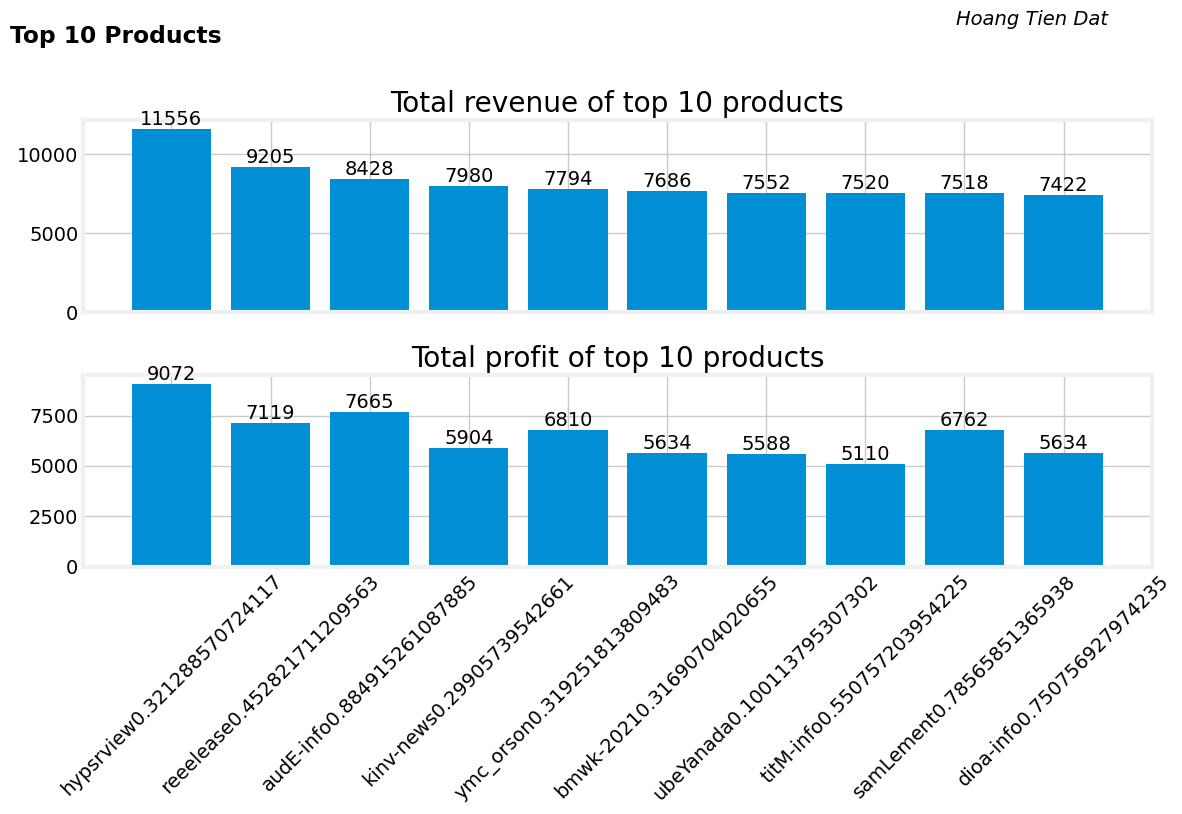

In [138]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
bars1 = ax[0].bar(top10['Product'], top10['revenue'])
ax[0].set_title('Total revenue of top 10 products')

bars2 = ax[1].bar(top10['Product'], top10['profit'])
ax[1].set_title('Total profit of top 10 products')

ax[0].bar_label(bars1, fmt='%d', label_type='edge')
ax[1].bar_label(bars2, fmt='%d', label_type='edge') 
fig.set_facecolor('white') 
for axes in ax:
    axes.set_facecolor('white')
plt.suptitle('Top 10 Brand',fontweight= 'bold',x=0.1,y=1)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.suptitle('Top 10 Products',fontweight= 'bold',x=0.1,y=1)
plt.text(0.8, 1, "Hoang Tien Dat", style='italic',transform=plt.gcf().transFigure)
plt.xticks(rotation = 45)
plt.show()


In [140]:
country = summary_product.groupby(['Country','Product']).sum().reset_index()
country['rank']= country.groupby(['Country'])['profit'].rank(ascending=False)
top_product_of_country = country[country['rank']==1][['Country','Product','profit','rank']].reset_index(drop=True)
top_product_of_country = top_product_of_country.iloc[:,0:3]
top_product_of_country

C:\Users\Admin\AppData\Local\Temp\ipykernel_15628\3663186781.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Country,Product,profit
0,FR - France,nikh-info0.430271486237569,4300
1,GER - Germany,bubYation0.817555121110279,5595
2,IT - Italy,oamyncusi0.488391788767068,3549
3,UK - United Kingdom,monRovich0.132545810317011,2664


# 3.	What customer segments are there?

In [30]:
customer_data = data.groupby(["CustomerID","FirstName", "LastName","Country","Birthday","DateJoined","Newsletter"]).\
                            agg(Total_expenditures = ('SellPrice','sum'),Total_orders= ('CustomerID','count')).reset_index()

In [31]:
from datetime import datetime, date
# Tạo fuction datediff
def date_diff(date_str):
    today = date.today()
    if isinstance(date_str, str):
         date_obj = datetime.strptime(date_str, "%Y-%m-%d")
         diff = today.year - date_obj.year
    else:
         diff = today.year - date_str.year
    return diff

customer_data['Age'] = customer_data['Birthday'].apply(lambda x: date_diff(x))
customer_data['Loyalty'] = customer_data['DateJoined'].apply(lambda x: date_diff(x))

In [32]:
customer_data

,CustomerID,FirstName,LastName,Country,Birthday,DateJoined,Newsletter,Total_expenditures,Total_orders,Age,Loyalty
0,0,V0.296680287495188,L0.104646531512644,FR - France,1968-02-03,2015-12-18,N,32997,45,56,9
1,1,D0.793097101838541,Law0.141693355411763,GER - Germany,2009-10-06,2015-12-21,Y,34948,39,15,9
2,2,Ker0.141418247925814,Ng0.753960335680345,FR - France,1990-08-04,2015-12-22,Y,17879,21,34,9
3,3,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,1974-07-24,2015-12-22,N,14603,19,50,9
4,4,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,1981-08-13,2015-12-22,N,37029,48,43,9
...,...,...,...,...,...,...,...,...,...,...,...
765,765,Ya0.945566148422846,Lo0.214781069325519,GER - Germany,1989-10-25,2016-09-05,N,29538,38,35,8
766,766,Yoo0.331072249620266,Low0.870500054610635,GER - Germany,1965-07-25,2016-09-05,Y,5331,7,59,8
767,767,Za0.957577858135873,Thoma0.729674423009536,GER - Germany,1980-11-07,2016-09-05,Y,45470,57,44,8
768,768,Y0.286774649994125,Aung0.752567424443609,GER - Germany,1980-09-17,2016-09-05,Y,35462,49,44,8


In [33]:
clustering = customer_data[['Age','Total_orders','Total_expenditures']]
clustering

,Age,Total_orders,Total_expenditures
0,56,45,32997
1,15,39,34948
2,34,21,17879
3,50,19,14603
4,43,48,37029
...,...,...,...
765,35,38,29538
766,59,7,5331
767,44,57,45470
768,44,49,35462


** Chúng ta sẽ chỉ phân loại khách hàng dựa trên 3 yếu tố chính đó là Tổng chi tiêu, Tuổi và Tổng orders**

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

In [35]:
X = clustering.iloc[:].values
scaler= StandardScaler()
scaled_feature = scaler.fit_transform(X)


In [36]:
# TÌm giá trị SSE(sum of squared error) để tìm ra hệ số K
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='random',n_init=10,max_iter=300,random_state=42)
    kmeans.fit(scaled_feature)
    sse.append(kmeans.inertia_)

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

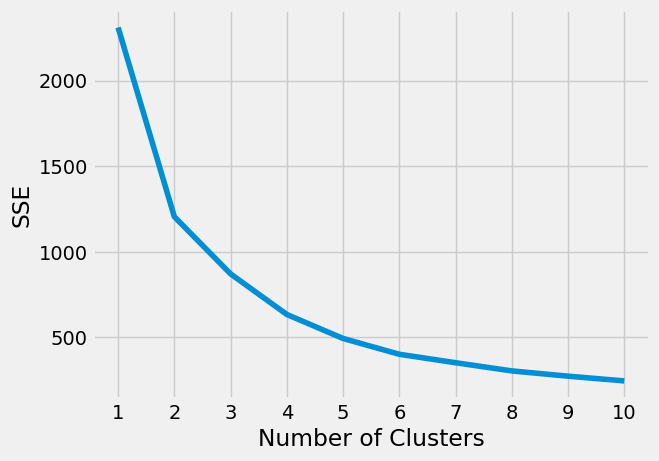

In [141]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [38]:
kl=KneeLocator(range(1,11),sse,curve='convex',direction='decreasing')
kl.elbow

4

In [39]:
silhouette_coefficients = []
for k in range(2, 11):
 kmeans = KMeans(n_clusters=k, init='random',n_init=10,max_iter=300,random_state=42)
 kmeans.fit(scaled_feature)
 score = silhouette_score(scaled_feature, kmeans.labels_)
 silhouette_coefficients.append(score)

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

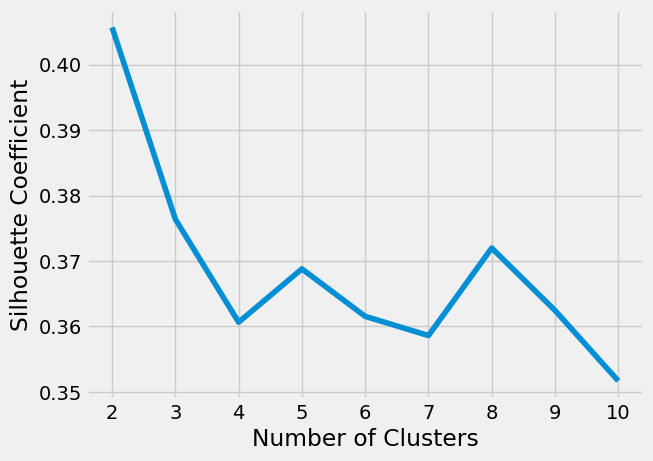

In [40]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

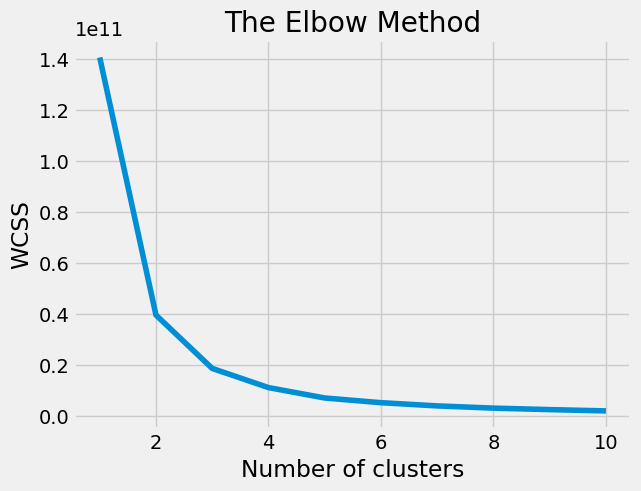

In [41]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

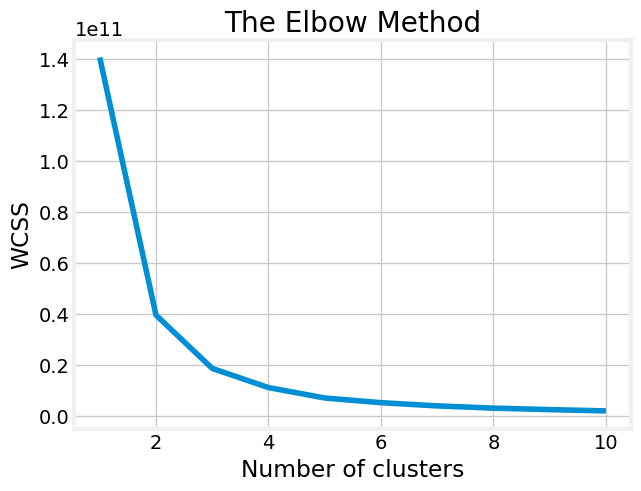

In [144]:
import matplotlib.pyplot as plt

# Sử dụng kiểu mặc định
plt.style.use("fivethirtyeight")

# Vẽ biểu đồ
fig, ax = plt.subplots()
ax.plot(range(1, 11), wcss)
ax.set_title('The Elbow Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')

# Đặt nền trắng cho cả biểu đồ và hình
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

# Hiển thị biểu đồ
plt.show()


***Như vậy ta có thể lấy K = 4 và K = 5 để chia nhóm***

Test k = 4

In [42]:
clustering

,Age,Total_orders,Total_expenditures
0,56,45,32997
1,15,39,34948
2,34,21,17879
3,50,19,14603
4,43,48,37029
...,...,...,...
765,35,38,29538
766,59,7,5331
767,44,57,45470
768,44,49,35462


In [43]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [44]:
clustering_k4 = clustering
clustering_k4['label'] = y_kmeans
import plotly.express as px
fig = px.scatter_3d(clustering_k4, x='Age', y='Total_orders', z='Total_expenditures', color='label')
fig.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15628\2175849232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_k4['label'] = y_kmeans


Test K = 5

In [45]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



In [46]:
clustering_k5 = clustering
clustering_k5['label'] = y_kmeans
fig = px.scatter_3d(clustering_k5, x='Age', y='Total_orders', z='Total_expenditures', color='label')
fig.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15628\2659391274.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
clustering_k4[clustering_k4['label']==0].describe()

,Age,Total_orders,Total_expenditures,label
count,179.000000,179.000000,179.000000,179.0
mean,36.653631,45.374302,36807.005587,0.0
std,12.865887,4.469574,2878.827874,0.0
min,14.000000,35.000000,31901.000000,0.0
25%,26.000000,42.000000,34456.000000,0.0
50%,36.000000,45.000000,36748.000000,0.0
75%,46.500000,49.000000,39427.000000,0.0
max,59.000000,61.000000,42116.000000,0.0


In [48]:
clustering_k4[clustering_k4['label']==1].describe()

,Age,Total_orders,Total_expenditures,label
count,150.000000,150.000000,150.000000,150.0
mean,34.920000,9.953333,7839.080000,1.0
std,13.398648,4.022315,3072.745074,0.0
min,14.000000,1.000000,745.000000,1.0
25%,23.250000,7.000000,5735.250000,1.0
50%,34.000000,10.000000,8160.000000,1.0
75%,46.000000,13.000000,10418.750000,1.0
max,59.000000,18.000000,12629.000000,1.0


In [49]:
clustering_k4[clustering_k4['label']==2].describe()

,Age,Total_orders,Total_expenditures,label
count,159.000000,159.000000,159.000000,159.0
mean,36.169811,21.893082,17400.138365,2.0
std,12.761298,3.999353,2747.991339,0.0
min,14.000000,14.000000,12668.000000,2.0
25%,25.000000,19.000000,14771.500000,2.0
50%,37.000000,21.000000,17392.000000,2.0
75%,46.000000,25.000000,19871.500000,2.0
max,59.000000,32.000000,22110.000000,2.0


In [50]:
clustering_k4[clustering_k4['label']==3].describe()

,Age,Total_orders,Total_expenditures,label
count,111.000000,111.000000,111.000000,111.0
mean,35.207207,57.324324,47544.522523,3.0
std,12.934181,4.315221,3960.263512,0.0
min,14.000000,48.000000,42365.000000,3.0
25%,24.000000,55.000000,44370.500000,3.0
50%,35.000000,57.000000,46730.000000,3.0
75%,46.000000,61.000000,50265.000000,3.0
max,59.000000,67.000000,62539.000000,3.0
